# The Spark Foundation 

## Task 3 : Exploratory Data Analysis on dataset 'samplestore'

### Author : Fathima Rizwana

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Input file

In [2]:
superstore= pd.read_csv("C:\\Users\\user\\Downloads\\SampleSuperstore.csv")

## Data Cleaning

In [3]:
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
superstore.shape

(9994, 13)

In [5]:
superstore.size

129922

In [6]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Checking for null values

In [7]:
# Checking for null values
superstore.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Checking for duplicate values and dropping it

In [8]:
# Checking for duplicates
superstore.duplicated().sum()

17

In [9]:
# Dropping the duplicate values
superstore.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
# Statistical details of the dataset
superstore[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Correlation

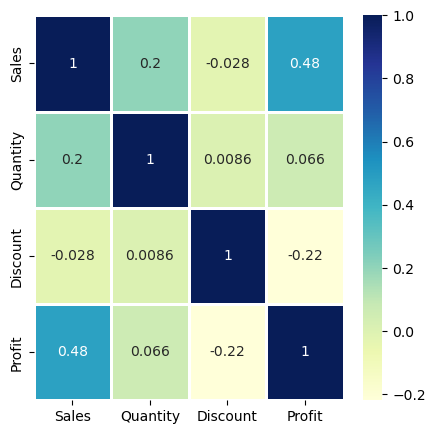

In [11]:
# Correlation
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(superstore[['Sales','Quantity','Discount','Profit']].corr(),cmap="YlGnBu",annot=True,linewidth=1)

### Finding Outliers

Finding Outliers in the data using IQR method and by usng boxplots

In [12]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [13]:
num_cols=['Sales','Profit','Discount','Quantity']
for i in num_cols:
    outliers = find_outliers_IQR(superstore[i])
    print("\n",i)

    print("number of outliers: "+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value: "+ str(outliers.min()))


 Sales
number of outliers: 1167
max outlier value: 22638.48
min outlier value: 499.168

 Profit
number of outliers: 1881
max outlier value: 8399.976
min outlier value: -6599.978

 Discount
number of outliers: 856
max outlier value: 0.8
min outlier value: 0.6

 Quantity
number of outliers: 170
max outlier value: 14
min outlier value: 10


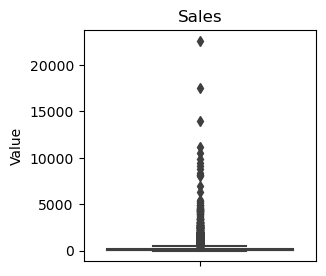

In [14]:
plt.figure(figsize=(3,3))
sns.boxplot(y=superstore['Sales'])
plt.title("Sales")
plt.ylabel("Value")
plt.show()

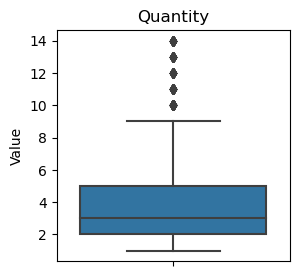

In [15]:
plt.figure(figsize=(3,3))
sns.boxplot(y=superstore['Quantity'])
plt.title("Quantity")
plt.ylabel("Value")
plt.show()

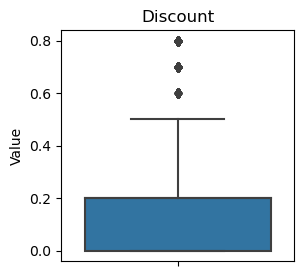

In [16]:
plt.figure(figsize=(3,3))
sns.boxplot(y=superstore['Discount'])
plt.title("Discount")
plt.ylabel("Value")
plt.show()

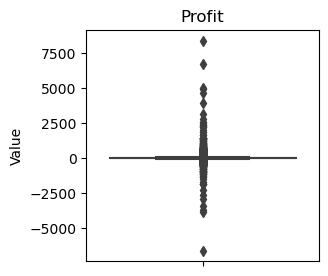

In [17]:
plt.figure(figsize=(3,3))
sns.boxplot(y=superstore['Profit'])
plt.title("Profit")
plt.ylabel("Value")
plt.show()

### Pairplot
Using pairplot to show pairwise relationship in the dataset

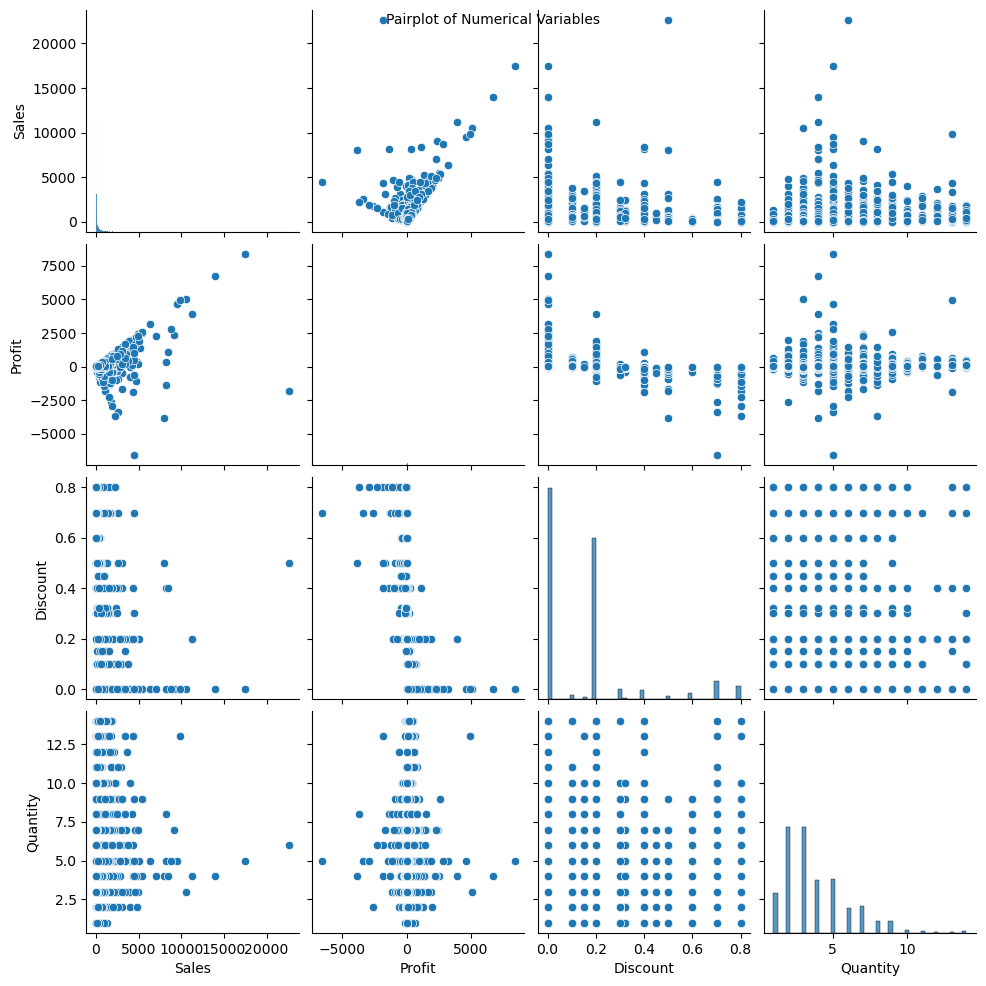

In [18]:
sns.pairplot(superstore[num_cols])
plt.suptitle('Pairplot of Numerical Variables', fontsize=10)
plt.show()

As Sales and Profit increases, Discount decreases

## Univariate analysis of categorical columns

In [19]:
# Region 
superstore['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

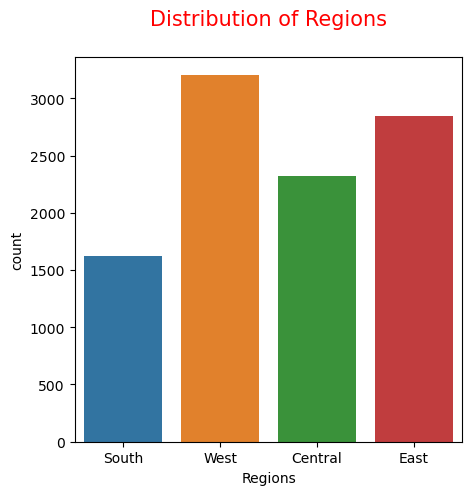

In [20]:
plt.figure(figsize = [5,5])
sns.countplot(x='Region',data=superstore)
plt.title('Distribution of Regions\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Regions")
plt.show()

In [21]:
# Category 
superstore['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

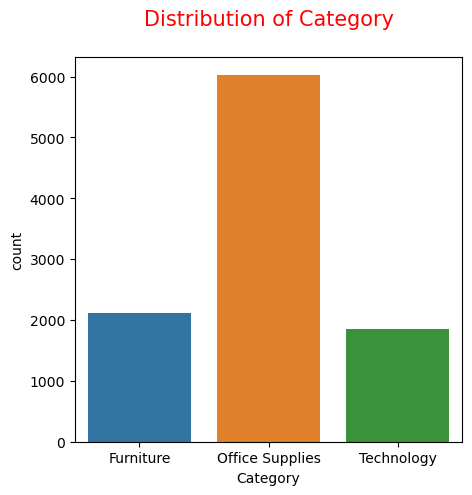

In [22]:
plt.figure(figsize = [5,5])
sns.countplot(x='Category',data=superstore)
plt.title('Distribution of Category\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Category")
plt.show()

In [23]:
# Sub-Category
superstore['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

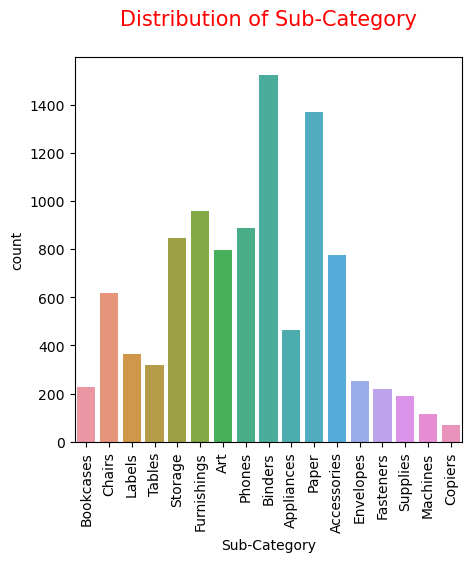

In [24]:
plt.figure(figsize = [5,5])
sns.countplot(x='Sub-Category',data=superstore)
plt.title('Distribution of Sub-Category\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Sub-Category")
plt.xticks(rotation="vertical")
plt.show()

In [25]:
# State
superstore['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

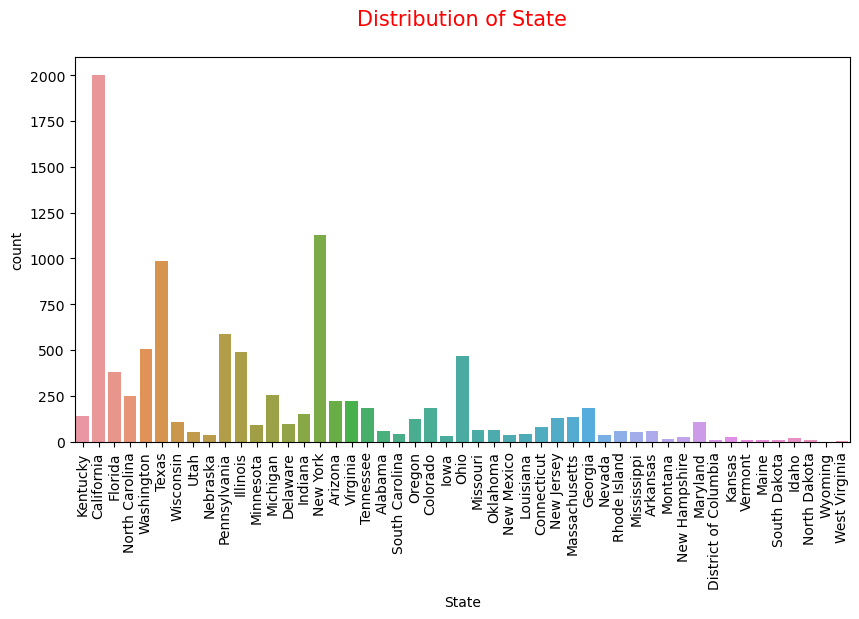

In [26]:
plt.figure(figsize = [10,5])
sns.countplot(x='State',data=superstore)
plt.title('Distribution of State\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("State")
plt.xticks(rotation="vertical")
plt.show()

In [27]:
# Ship Mode
superstore['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

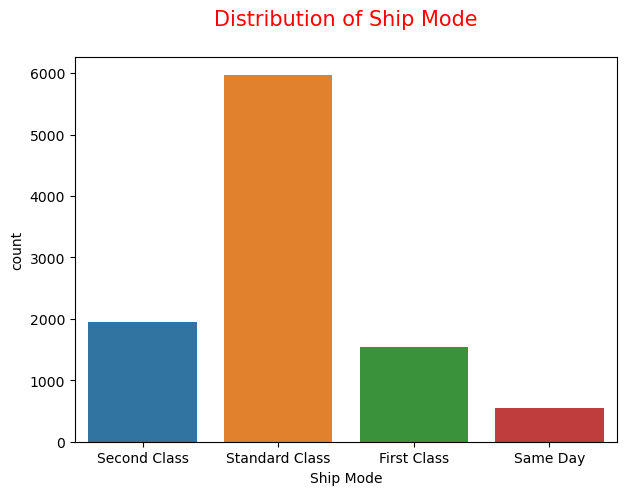

In [28]:
plt.figure(figsize = [7,5])
sns.countplot(x='Ship Mode',data=superstore)
plt.title('Distribution of Ship Mode\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Ship Mode")
plt.show()

In [29]:
# Segment
superstore['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

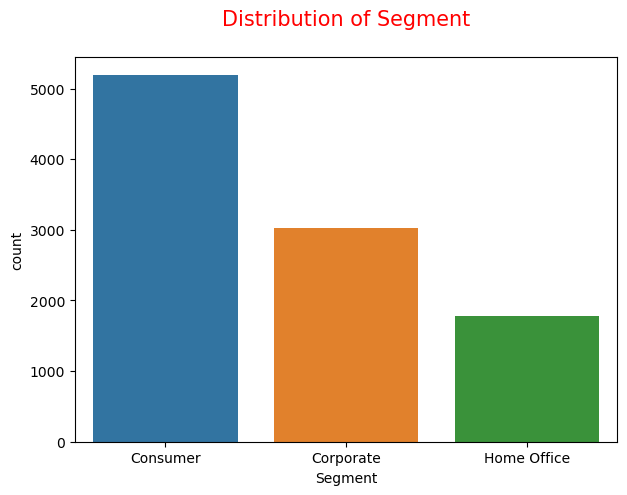

In [30]:
plt.figure(figsize = [7,5])
sns.countplot(x='Segment',data=superstore)
plt.title('Distribution of Segment\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Segment")
plt.show()

## Bivariate Analysis on categorical columns

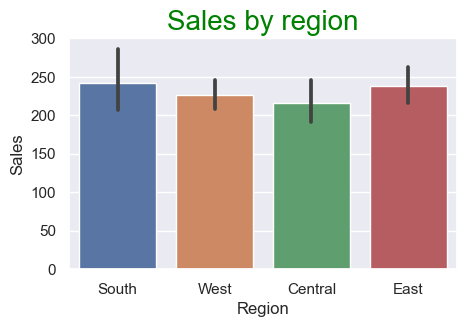

In [31]:
# Sales by region

plt.figure(figsize = (5,3))
sns.set(font_scale=1)
sns.barplot(x='Region', y='Sales', data=superstore)
plt.title("Sales by region",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

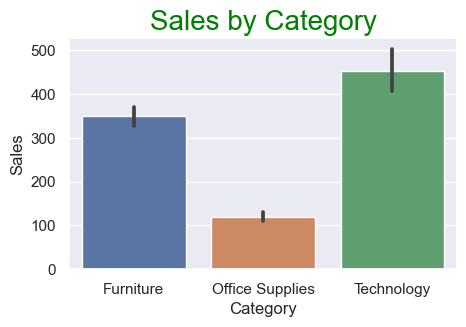

In [32]:
# Sales by Category

plt.figure(figsize = (5,3))
sns.set(font_scale=1)
sns.barplot(x='Category', y='Sales', data=superstore)
plt.title("Sales by Category",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

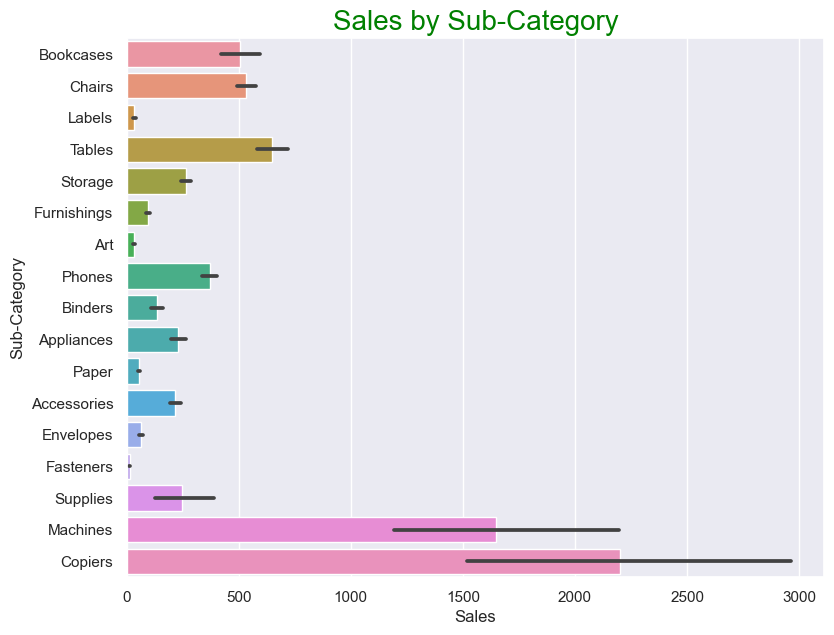

In [33]:
# Sub-Category wise sales
plt.figure(figsize = (9,7))
sns.set(font_scale=1)
sns.barplot(x='Sales', y='Sub-Category', data=superstore)
plt.title("Sales by Sub-Category",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

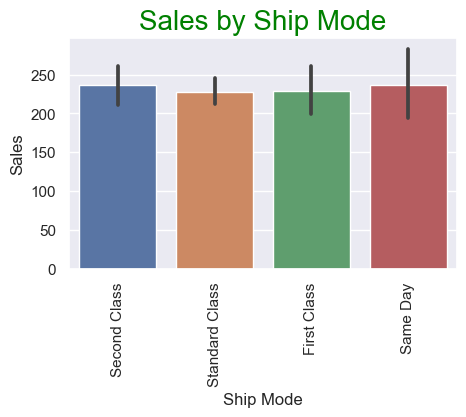

In [34]:
# Sales by Ship Mode

plt.figure(figsize = (5,3))
sns.set(font_scale=1)
sns.barplot(x='Ship Mode', y='Sales', data=superstore)
plt.title("Sales by Ship Mode",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation="vertical")
plt.show()

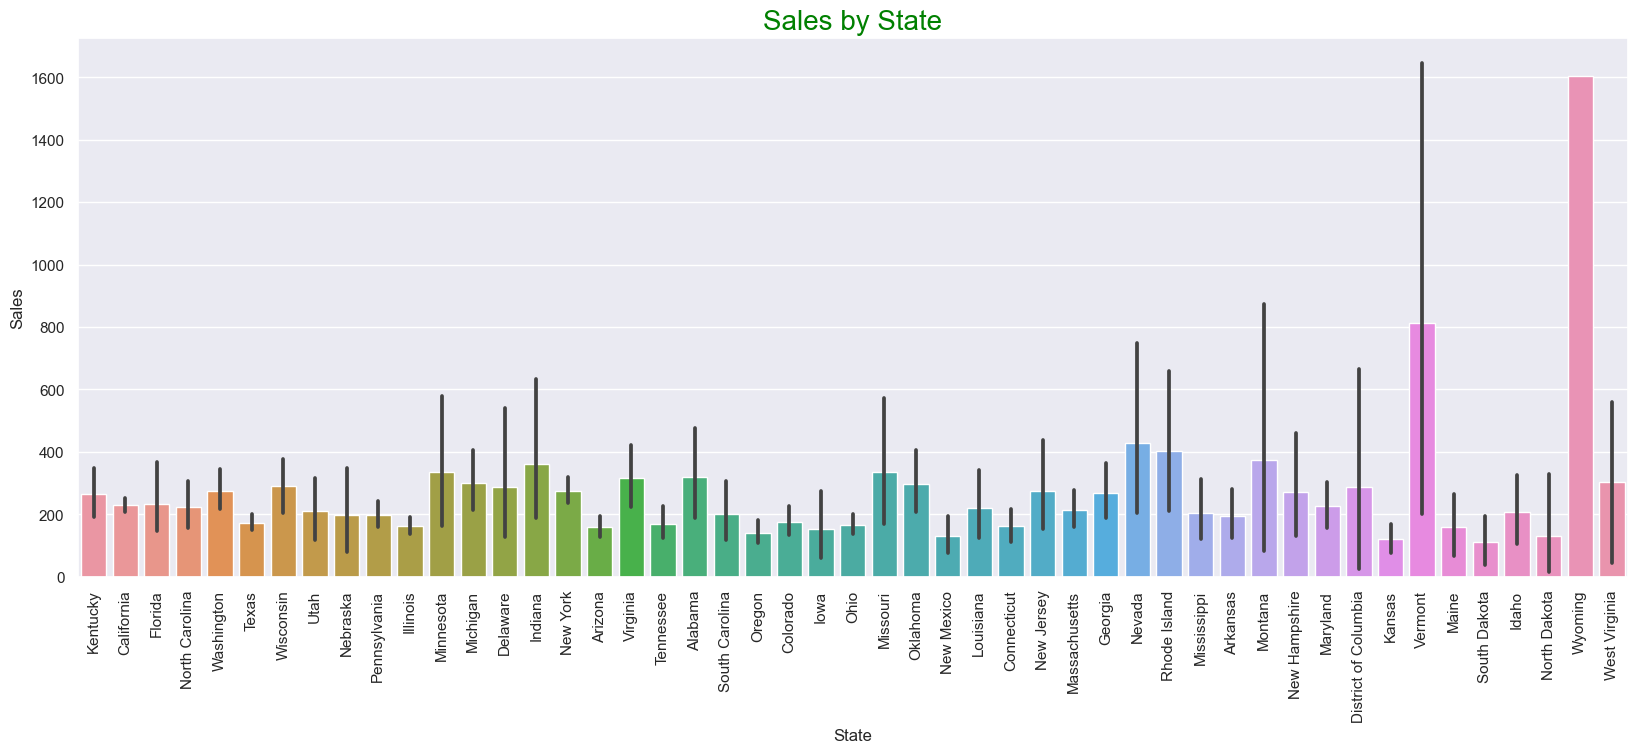

In [35]:
# Sales by state

plt.figure(figsize = (20,7))
sns.set(font_scale=1)
sns.barplot(x='State', y='Sales', data=superstore)
plt.title("Sales by State",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation="vertical")
plt.show()

In [36]:
# Region wise sales of Sub-Category
region_subCategory=superstore.groupby(['Region','Sub-Category']).sum()['Sales']
region_subCategory

Region   Sub-Category
Central  Accessories     33956.0760
         Appliances      23582.0330
         Art              5765.3400
         Binders         56923.2820
         Bookcases       24157.1768
                            ...    
West     Paper           26663.7180
         Phones          98684.3520
         Storage         70532.8520
         Supplies        18127.1220
         Tables          84754.5620
Name: Sales, Length: 68, dtype: float64

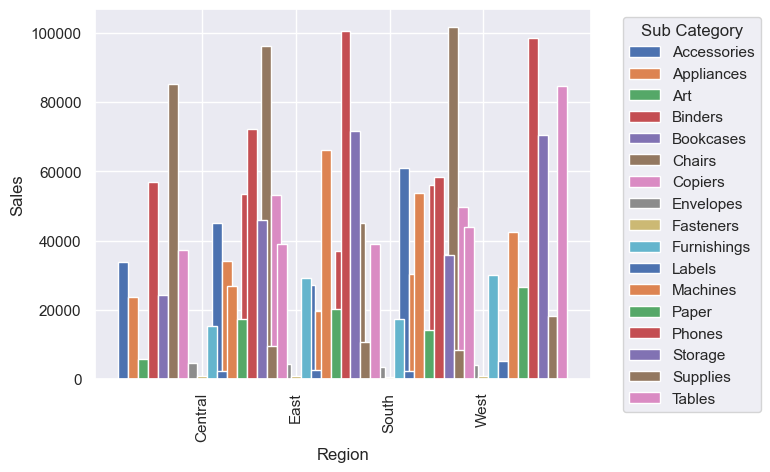

In [37]:
region_subCategory.unstack().plot.bar(width=1.8)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.legend(title="Sub Category",loc='upper left',bbox_to_anchor=(1.05,1.0))
plt.show()

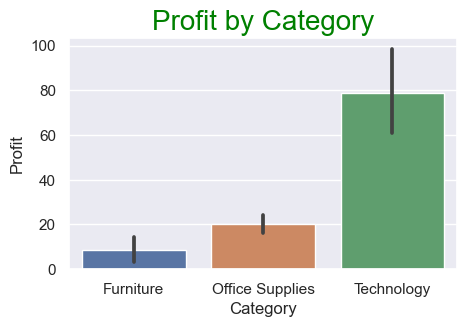

In [38]:
# Profit by Category
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
sns.barplot(x='Category', y='Profit', data=superstore)
plt.title("Profit by Category",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

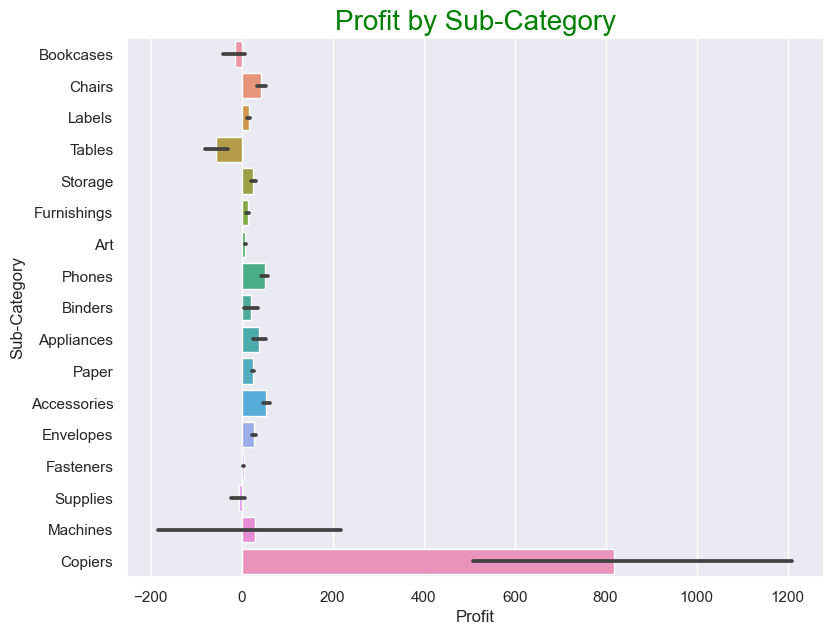

In [39]:
# Profit of each sub-category
plt.figure(figsize = (9,7))
sns.set(font_scale=1)
sns.barplot(x='Profit', y='Sub-Category', data=superstore)
plt.title("Profit by Sub-Category",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

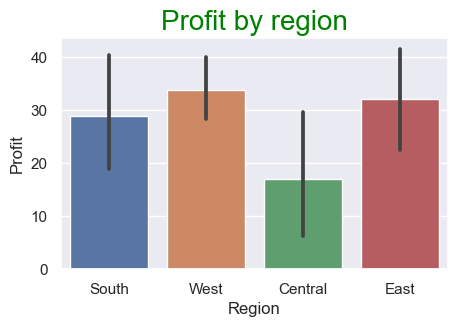

In [40]:
# Profit by Region
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
sns.barplot(x='Region', y='Profit', data=superstore)
plt.title("Profit by region",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

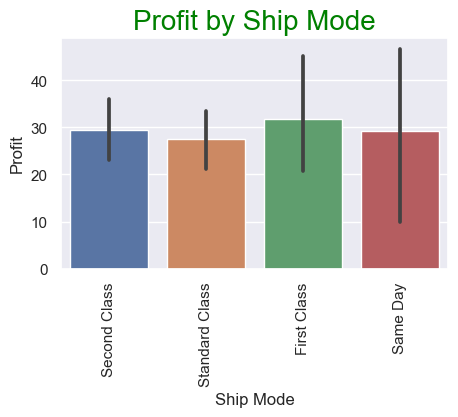

In [41]:
# Profit by Ship Mode
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
sns.barplot(x='Ship Mode', y='Profit', data=superstore)
plt.title("Profit by Ship Mode",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation="vertical")
plt.show()

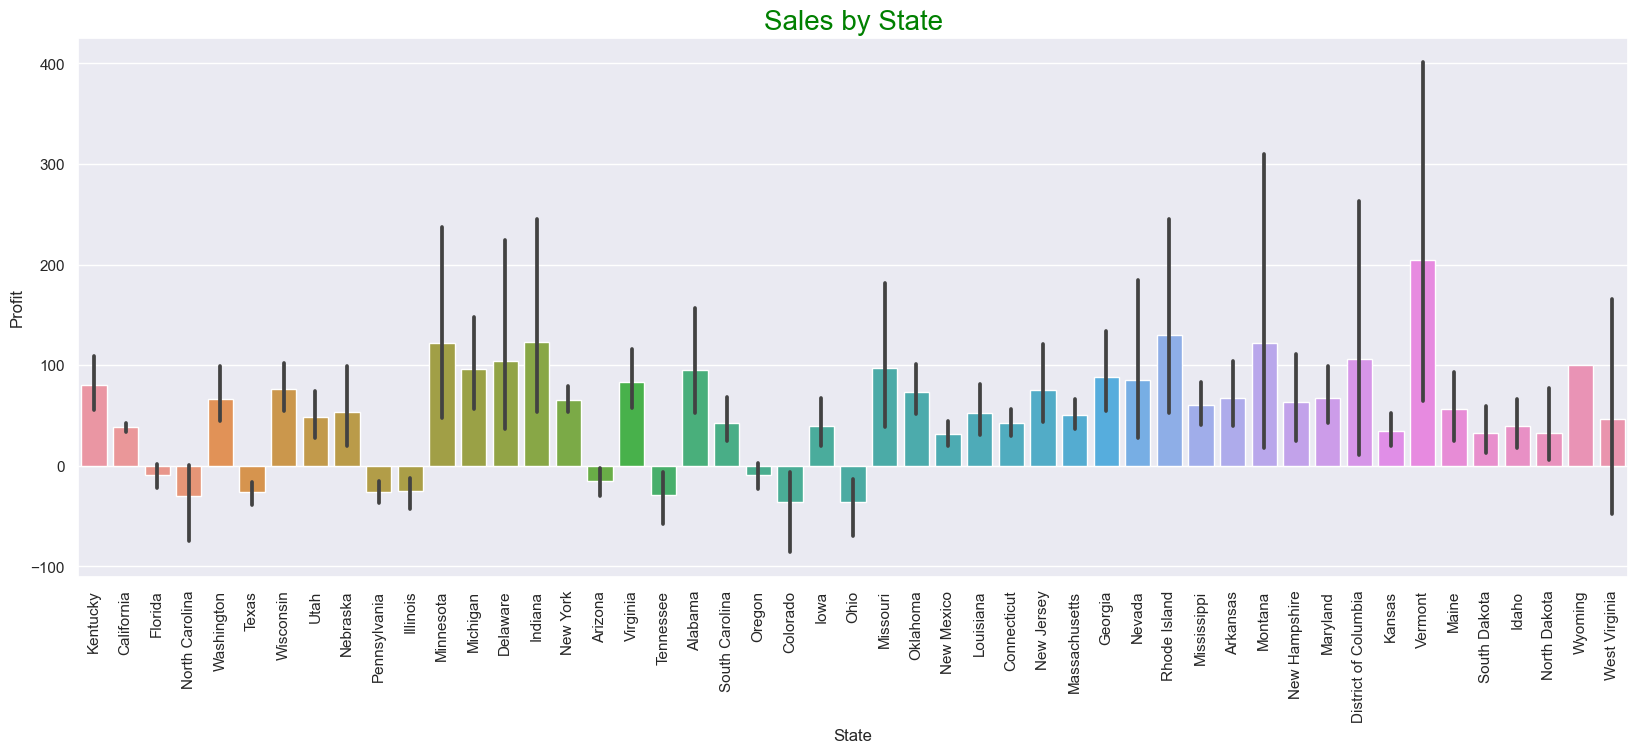

In [42]:
# Profit by state
plt.figure(figsize = (20,7))
sns.set(font_scale=1)
sns.barplot(x='State', y='Profit', data=superstore)
plt.title("Sales by State",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation="vertical")
plt.show()

### Sales and Profit for each category

In [43]:
Category_details=superstore.groupby(['Category']).sum()[['Sales','Profit']]
Category_details

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


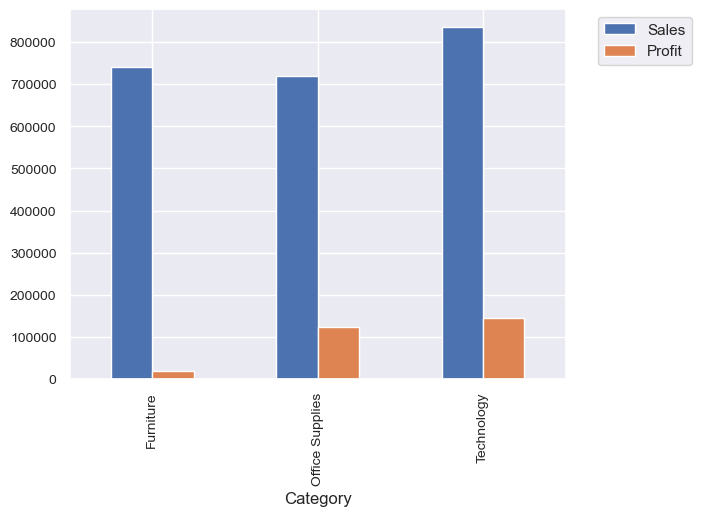

In [44]:
Category_details.plot(kind="bar",fontsize=10)
plt.xlabel("Category")
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1.0))
plt.show()

### Sales and Profit for each Segment

In [45]:
Segment_details=superstore.groupby(['Segment']).sum()[['Sales','Profit']]
Segment_details


,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


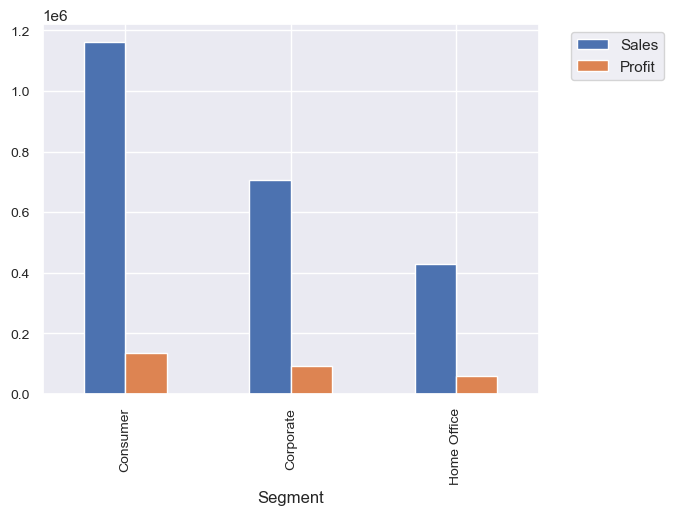

In [46]:
Segment_details.plot(kind="bar",fontsize=10)
plt.xlabel("Segment")
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1.0))
plt.show()

### Sales and Profit for each Sub-Category

In [47]:
Sub_Category_details=superstore.groupby(['Sub-Category']).sum()[['Sales','Profit']]
Sub_Category_details

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


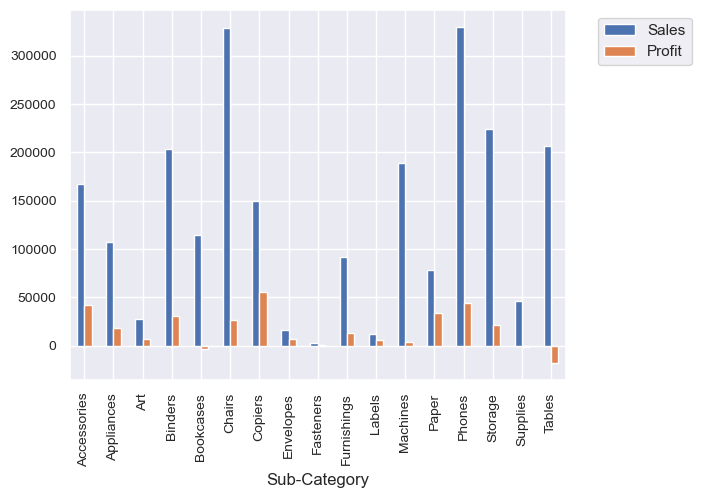

In [48]:
Sub_Category_details.plot(kind="bar",fontsize=10)
plt.xlabel("Sub-Category")
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1.0))
plt.show()

## Conclusion:<br>

* Sales are higher in the technology category, while office supplies have very low sales. Thus, there is a need to focus on increasing sales in the office supplies category.<br>
* Copiers and machines have higher sales compared to other subcategories, whereas fasteners, labels, and art have low sales.<br>
* Although furniture has considerably good sales, it yields less profit compared to office supplies.<br>
* Tables and bookcases subcategories are generating losses.<br>
* The South and East regions have slightly higher sales compared to the West and Central regions. Therefore, it is recommended to concentrate more on improving sales in the West and Central regions.<br>